# Machine Learning Exercise 2

This notebook covers logistic regression and gradient descent.

In [1]:
import numpy
import math
from matplotlib import pyplot as plt
%matplotlib inline

As usual, need to read in the data from the files:

In [2]:
from numpy import genfromtxt
def load(f):
    '''Parse the data from the input file and store in pandas dataframs'''
    # Verify the file exist:
    try:
        _file = open(f, "r")
    except:
        print "ERROR: requested file {} does not exist or could not be opened."

    # For this exercise, both files are csv format:
    data = numpy.genfromtxt(f,delimiter=',')
    return data.T

Load the data from the file:

In [3]:
x1,x2,y = load("ex2/ex2data1.txt")

We want to make a scatter plot of the data, but the marker used needs to be based on the value of y.  Here's a way to do that:

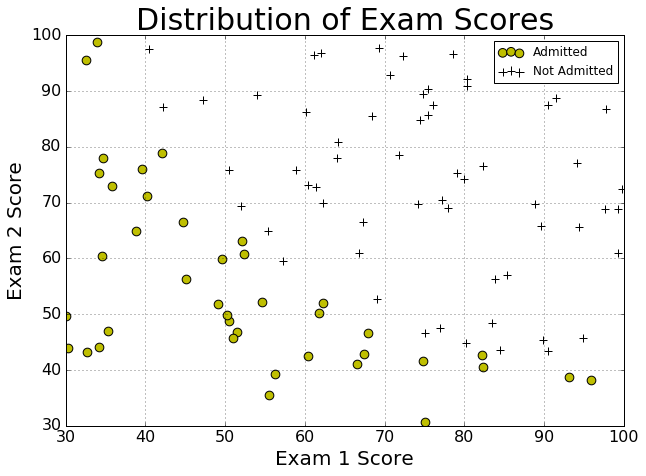

In [4]:

# Set up the plots
fig, ax = plt.subplots(figsize=(10, 7))

# Go through the data and separate all of the types of answers:
unique_vals = set(y)

# Since I know there are two values, I can define the markers by hand:
markers = ["o","+"]
colors = ['y','black']
labels =['Admitted', 'Not Admitted']

# Here's the cool part: numpy can distribute the comparison operator to the whole array:
i = 0
for val in unique_vals:
    mask = (y == val )
    

    # Make a scatter plot
    ax.scatter(
        x1[mask], x2[mask], c=colors[i], marker=markers[i],label=labels[i],s=75)

    i += 1
    
# Plots require a title and axis labels:
plt.title("Distribution of Exam Scores", fontsize=30)
plt.xlabel("Exam 1 Score", fontsize=20)
plt.ylabel("Exam 2 Score", fontsize=20)

# Make the ticks bigger to be more visible:
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(16)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(16)

# Let's set the axis ranges a little more realistically:
ax.set_xlim([30, 100])
ax.set_ylim([30, 100])

# Need a legend, of course:
plt.legend()

plt.grid(True)

We need to implement the sigmoid function, and it should work on really any input

In [5]:
def pysigmoid(x):
    return 1.0/(1 + numpy.exp(-x))

This does actually work on arrays, since numpy automatically flattens and distributes operations and operators:

In [6]:
pysigmoid(0.01*x2)

array([ 0.68573333,  0.6080088 ,  0.67459062,  0.7033049 ,  0.67992861,
        0.63718425,  0.7241446 ,  0.61432762,  0.70562006,  0.60714664,
        0.59441633,  0.57591658,  0.68239921,  0.72654968,  0.68143365,
        0.70931789,  0.6288776 ,  0.6146227 ,  0.71692744,  0.61674608,
        0.60548781,  0.65880955,  0.6197667 ,  0.60875818,  0.66590544,
        0.66808679,  0.61021506,  0.59580276,  0.62306101,  0.65700073,
        0.67438355,  0.63888312,  0.65277879,  0.66692915,  0.67077172,
        0.62764777,  0.72882996,  0.69191355,  0.60246202,  0.67969646,
        0.637165  ,  0.61504356,  0.65829137,  0.60017217,  0.61259349,
        0.62729037,  0.66920288,  0.70417904,  0.72465848,  0.70826303,
        0.67735245,  0.64793859,  0.606806  ,  0.64656255,  0.62199988,
        0.64521909,  0.66565892,  0.72231731,  0.66779871,  0.68665682,
        0.70215885,  0.61543231,  0.59691198,  0.62150233,  0.66027072,
        0.60130869,  0.72618495,  0.62687464,  0.71527853,  0.64

But it's not super fast:

In [7]:
%timeit -n 5000 pysigmoid(0.01*x2)

5000 loops, best of 3: 6.46 µs per loop


This function, though, is already implemented in python packages:

In [8]:
from scipy.special import expit as sigmoid
%timeit  -n 5000 sigmoid(0.5*x2)

5000 loops, best of 3: 3.35 µs per loop


So, that's about a factor of two in speed up.  It doesn't really matter here, since if we wanted speed we'd probably not use python, but it's fun to know about these things.

Define the cost function:

In [21]:
def h(_theta, _x):
    return sigmoid(numpy.dot(_theta,_x))

def cost(_theta, _x, _y):
    val = (1.0/len(_y)) * (-numpy.dot(y.T, numpy.log(h(_theta,_x))) 
                       - numpy.dot((1-y).T, numpy.log(1 - h(_theta,_x))))
    return val.flatten()


Define the vector x to use in the functions:

In [12]:
x = numpy.ndarray((3,len(x1)))
x[0] = 1
x[1] = x1
x[2] = x2
print x.shape

(3, 100)


In [22]:
h(theta,x)

array([ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5])

Also, define the theta vector:

In [17]:
theta = numpy.zeros((x.shape[0]))
print theta.shape

(3,)


Also, let's check the cost function works properly:

In [23]:
print cost(theta,x,y)

[ 0.69314718]


We also need a function to compute the gradient at each step:

In [28]:
def gradient(_theta,_x,_y):
    return (1.0/len(_y)) * numpy.dot((h(_theta,_x) - y),_x.T)


In [29]:
print "Initial gradient: ", gradient(theta,x,y)

Initial gradient:  [ -0.1        -12.00921659 -11.26284221]


Similar to the octave implementation, we will use a built in function to do the gradient descent.  In this case, we'll use scipy.optimize.:
http://docs.scipy.org/doc/scipy/reference/optimize.html

In [47]:
from scipy.optimize import minimize

In [49]:
def min_func(_theta, _x, _y):
    return cost(_theta,_x,_y), gradient(_theta,_x,_y)

It looks quite easy to supply the cost function, the gradient and the initial guess to this function:

In [52]:
params = minimize(min_func,theta,jac=True,args=(x,y),method="NEWTON-CG")
print params

     fun: 0.2034977056769983
     jac: array([ -2.33689182e-05,  -1.59683653e-03,  -1.50210102e-03])
 message: 'Optimization terminated successfully.'
    nfev: 73
    nhev: 0
     nit: 28
    njev: 242
  status: 0
 success: True
       x: array([-25.15609631,   0.20618934,   0.20142972])


Interestingly, scipy can compute the minimum of a function without knowledge of the gradient:

In [54]:
minimize(cost,theta,args=(x,y),method="Nelder-Mead")


 final_simplex: (array([[-25.16130062,   0.20623142,   0.20147143],
       [-25.16135807,   0.20623176,   0.20147199],
       [-25.1613519 ,   0.20623203,   0.20147171],
       [-25.16137971,   0.20623202,   0.20147188]]), array([ 0.2034977,  0.2034977,  0.2034977,  0.2034977]))
           fun: 0.2034977015902151
       message: 'Optimization terminated successfully.'
          nfev: 287
           nit: 157
        status: 0
       success: True
             x: array([-25.16130062,   0.20623142,   0.20147143])

The method gets the same answer, up to about 0.1% difference.  But, notice that the "nit" paramet is 28 when the gradient is supplied and 157 without it.  Clearly, the optimization is faster with the gradient.

Now we should verify the optimzation succeeded by looking at the cost and also plotting the decision boundary

In [63]:
opt_theta = params.x
print "Cost at optimized values is {}".format(cost(opt_theta,x,y))

Cost at optimized values is [ 0.20349771]


In [79]:
def predict(exam1,exam2):
    return h(opt_theta,(1,exam1,exam2))

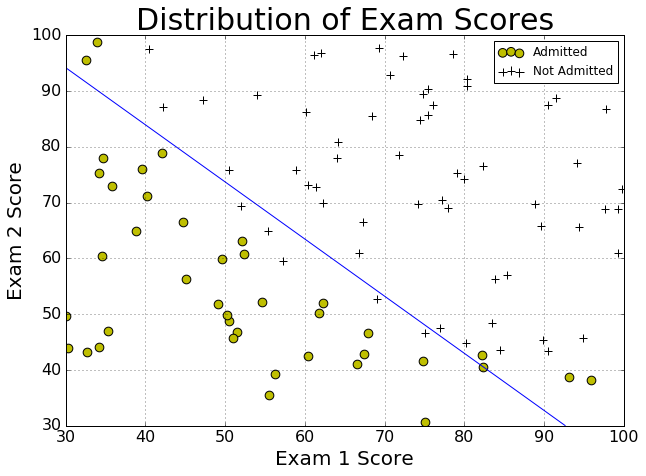

In [80]:

# Set up the plots
fig, ax = plt.subplots(figsize=(10, 7))

# Go through the data and separate all of the types of answers:
unique_vals = set(y)

# Since I know there are two values, I can define the markers by hand:
markers = ["o","+"]
colors = ['y','black']
labels =['Admitted', 'Not Admitted']

# Here's the cool part: numpy can distribute the comparison operator to the whole array:
i = 0
for val in unique_vals:
    mask = (y == val )
    

    # Make a scatter plot
    ax.scatter(
        x1[mask], x2[mask], c=colors[i], marker=markers[i],label=labels[i],s=75)

    i += 1
    
# The way to make a decision boundary plot work well is to draw it as a contour plot.
# Create a list of exam values to sample over
exam0_vals = numpy.arange(30,100,0.5)
exam1_vals = numpy.arange(30,100,0.5)
j_vals = numpy.zeros((len(exam1_vals),len(exam0_vals)))

for i in xrange(len(exam0_vals)):
    for j in xrange(len(exam1_vals)):
        j_vals[j][i] = predict(exam0_vals[i],exam1_vals[j])

# print j_vals
        
# Make the contour plot of the cost function:
contours = plt.contour(exam0_vals,exam1_vals,j_vals,
                       levels=[0.5],
                       colors=['b'],
                       label="Cost Function")
# plt.clabel(contours, inline=1, fmt='%1.1f',fontsize=10)
        
# The method used above is slower, but also generalized for complicated contours
        
# Plots require a title and axis labels:
plt.title("Distribution of Exam Scores", fontsize=30)
plt.xlabel("Exam 1 Score", fontsize=20)
plt.ylabel("Exam 2 Score", fontsize=20)

# Make the ticks bigger to be more visible:
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(16)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(16)

# Let's set the axis ranges a little more realistically:
ax.set_xlim([30, 100])
ax.set_ylim([30, 100])

# Need a legend, of course:
plt.legend()

plt.grid(True)

Looks decent enough.

In [81]:
predict(45,85)

0.77625087342149368